In [1]:

## Data Manipulation
import pandas as pd
import numpy as np
import time
from datetime import datetime

## Plotting
import seaborn as sns
import matplotlib.pyplot as plt

## Custom 
import ElexonDataPortal.API as edp_API
from ElexonDataPortal import cleaner, plotter

In [2]:

API_key = 'KEY'

edp_wrapper = edp_API.Wrapper(API_key)

In [8]:

stream = 'B1630'

query_args = {
    'start_date' : '2019-09-25',
    'end_date' : '2019-09-25 23:30',
}

df_RES = edp_wrapper.query_orchestrator(stream, query_args)

df_RES.head(3)

 [████████████████████████████████████████████████████████████] 48/48 [01:07<00:01, 1.39s/it]

,timeSeriesID,businessType,powerSystemResourceType,settlementDate,settlementPeriod,quantity,documentType,processType,curveType,resolution,activeFlag,documentID,documentRevNum,datetime
0,NGET-EMFIP-AGWS-TS-00291797,Solar generation,"""Solar""",2019-09-25,1,0,Wind and solar generation,Realised,Sequential fixed size block,PT30M,Y,NGET-EMFIP-AGWS-00145921,1,2019-09-25 00:00:00+01:00
1,NGET-EMFIP-AGWS-TS-00291798,Wind generation,"""Wind Offshore""",2019-09-25,1,96.01,Wind and solar generation,Realised,Sequential fixed size block,PT30M,Y,NGET-EMFIP-AGWS-00145921,1,2019-09-25 00:00:00+01:00
2,NGET-EMFIP-AGWS-TS-00291799,Wind generation,"""Wind Onshore""",2019-09-25,1,930.869,Wind and solar generation,Realised,Sequential fixed size block,PT30M,Y,NGET-EMFIP-AGWS-00145921,1,2019-09-25 00:00:00+01:00


In [6]:
clean_column_names = lambda df: df.rename(columns=dict(zip(df.columns, (df.columns
                                                                        .str.replace('"', '')
                                                                        .str.replace(' ', '_')
                                                                        .str.lower()))))

df_RES_cleaned = (df_RES
                  .pivot('datetime', 'powerSystemResourceType', 'quantity') 
                  .pipe(clean_column_names)
                  .astype(float)                 
                 )

df_RES_cleaned.head()

powerSystemResourceType,solar,wind_offshore,wind_onshore
datetime,,,
2019-09-25 00:00:00+01:00,0.0,96.010,930.869
2019-09-25 00:30:00+01:00,0.0,96.010,930.869
2019-09-25 01:00:00+01:00,0.0,92.056,917.728
2019-09-25 01:30:00+01:00,0.0,86.549,909.147
2019-09-25 02:00:00+01:00,0.0,85.401,888.026


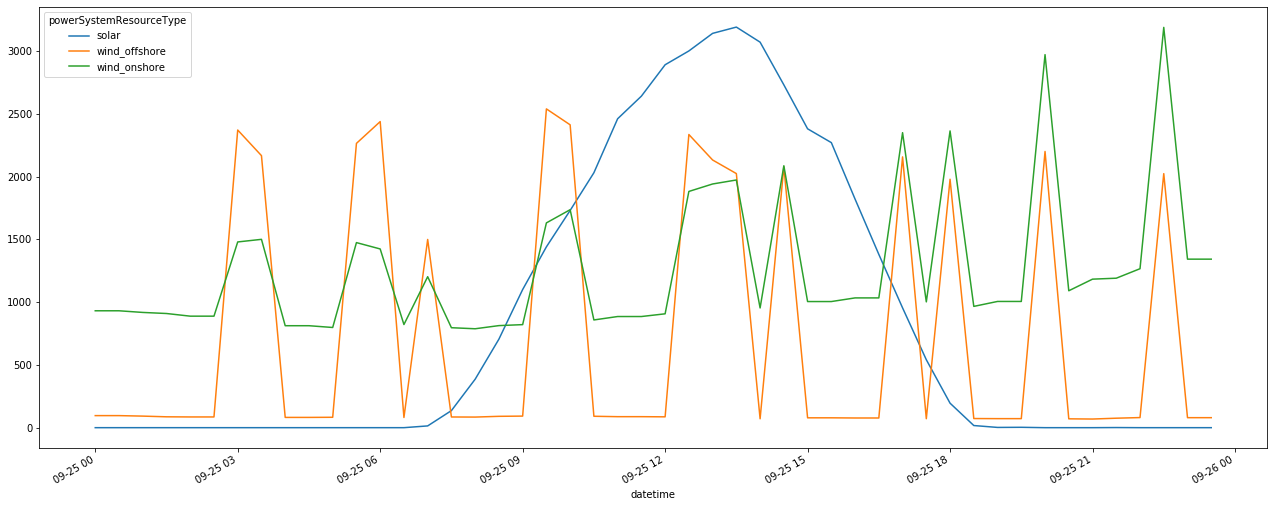

In [74]:
df_RES_cleaned.plot(figsize=(22,9))

In [75]:
stream = 'B1610'

query_args = {
    'start_date' : '2019-09-25',
    'end_date' : '2019-09-25 23:30',
    'BMU_id' : 'LARYO-1'
}

df_LARYO1_gen = edp_wrapper.query_orchestrator(stream, query_args)

df_LARYO1_gen

 [████████████████████████████████████████████████████████████] 48/48 [01:08<00:01, 1.42s/it]

,documentType,businessType,processType,timeSeriesID,curveType,settlementDate,powerSystemResourceType,registeredResourceEICCode,marketGenerationUnitEICCode,marketGenerationBMUId,...,nGCBMUnitID,activeFlag,documentID,documentRevNum,0,end,quantity,settlementPeriod,start,datetime
0,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-294,Sequential fixed size block,2019-09-25,Generation,48W00000LARYO-1Z,48W00000LARYO-1Z,T_LARYW-1,...,LARYO-1,Y,ELX-EMFIP-AGOG-21819975,1,NaN,NaN,91.618,1,NaN,2019-09-25 00:00:00+01:00
1,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-294,Sequential fixed size block,2019-09-25,Generation,48W00000LARYO-1Z,48W00000LARYO-1Z,T_LARYW-1,...,LARYO-1,Y,ELX-EMFIP-AGOG-21819975,1,PT30M,NaN,NaN,NaN,NaN,2019-09-25 00:00:00+01:00
2,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-294,Sequential fixed size block,2019-09-25,Generation,48W00000LARYO-1Z,48W00000LARYO-1Z,T_LARYW-1,...,LARYO-1,Y,ELX-EMFIP-AGOG-21819975,1,NaN,2019-09-25,NaN,NaN,2019-09-25,2019-09-25 00:00:00+01:00
3,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-640,Sequential fixed size block,2019-09-25,Generation,48W00000LARYO-1Z,48W00000LARYO-1Z,T_LARYW-1,...,LARYO-1,Y,ELX-EMFIP-AGOG-21819975,1,NaN,NaN,113.4,2,NaN,2019-09-25 00:30:00+01:00
4,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-640,Sequential fixed size block,2019-09-25,Generation,48W00000LARYO-1Z,48W00000LARYO-1Z,T_LARYW-1,...,LARYO-1,Y,ELX-EMFIP-AGOG-21819975,1,PT30M,NaN,NaN,NaN,NaN,2019-09-25 00:30:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-17988,Sequential fixed size block,2019-09-25,Generation,48W00000LARYO-1Z,48W00000LARYO-1Z,T_LARYW-1,...,LARYO-1,Y,ELX-EMFIP-AGOG-21819975,1,PT30M,NaN,NaN,NaN,NaN,2019-09-25 23:00:00+01:00
140,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-17988,Sequential fixed size block,2019-09-25,Generation,48W00000LARYO-1Z,48W00000LARYO-1Z,T_LARYW-1,...,LARYO-1,Y,ELX-EMFIP-AGOG-21819975,1,NaN,2019-09-25,NaN,NaN,2019-09-25,2019-09-25 23:00:00+01:00
141,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-18358,Sequential fixed size block,2019-09-25,Generation,48W00000LARYO-1Z,48W00000LARYO-1Z,T_LARYW-1,...,LARYO-1,Y,ELX-EMFIP-AGOG-21819975,1,NaN,NaN,130.838,48,NaN,2019-09-25 23:30:00+01:00
142,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-18358,Sequential fixed size block,2019-09-25,Generation,48W00000LARYO-1Z,48W00000LARYO-1Z,T_LARYW-1,...,LARYO-1,Y,ELX-EMFIP-AGOG-21819975,1,PT30M,NaN,NaN,NaN,NaN,2019-09-25 23:30:00+01:00


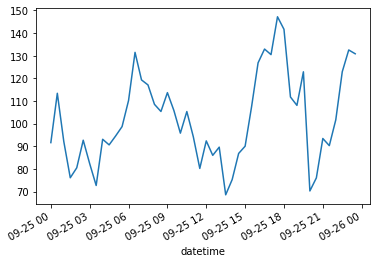

In [76]:
df_LARYO1_gen_cleaned = (df_LARYO1_gen
                         [~df_LARYO1_gen['settlementPeriod'].isnull()] # Filtering for rows specific to a SP
                         .set_index('datetime') 
                         ['quantity']
                         .astype(float)
                        )

df_LARYO1_gen_cleaned.plot()

In [77]:
# Playing with time

In [78]:
from datetime import datetime, timedelta
date_yday = datetime.strftime(datetime.now() - timedelta(1), '%Y-%m-%d')
date_today = datetime.strftime(datetime.now() - timedelta(0), '%Y-%m-%d')

In [79]:
date_yday

'2020-07-28'

In [80]:
date_today

'2020-07-29'

In [81]:
stream = 'B1630'

query_args = {
    'query_date' : date_yday,
    'SP' : 48,
}

df_RES_gen = edp_wrapper.query(stream, query_args)

df_RES_gen

/Users/kieranodonnell/opt/anaconda3/lib/python3.7/site-packages/ElexonDataPortal/API.py:152: UserWarning: Data request was succesful but no content was returned
  warnings.warn(f'Data request was succesful but no content was returned')


""


In [82]:
clean_column_names = lambda df: df.rename(columns=dict(zip(df.columns, (df.columns
                                                                        .str.replace('"', '')
                                                                        .str.replace(' ', '_')
                                                                        .str.lower()))))

df_RES_cleaned = (df_RES_gen
                  .pivot('datetime', 'powerSystemResourceType', 'quantity') 
                  .pipe(clean_column_names)
                  .astype(float)                 
                 )

df_RES_cleaned.head()

KeyError: 'datetime'

In [ ]:
stream = 'B1630'

query_args = {
    'start_date' : '2019-09-25',
    'end_date' : '2019-10-09 23:30',
}

df_RES = edp_wrapper.query_orchestrator(stream, query_args)

df_RES.head(3)